# classification

## problem definition
- predict if a patient will suffer with hearing disabilities

### pre-requisites

In [1]:
import warnings

warnings.filterwarnings(action='ignore')

### import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [3]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

### pre-processing

In [7]:
# split the data into x and y
x = df.drop('test_result', axis=1)
y = df['test_result']

In [8]:
# split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### train the models

#### Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

def create_model_logistic_regression():
    # create the model
    model = LogisticRegression(max_iter=1000)
    
    # train the model
    model.fit(x_train, y_train)

    return model

#### Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

def create_model_naive_bayes():
    # create the model
    model = GaussianNB()
    
    # train the model
    model.fit(x_train, y_train)

    return model

#### KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

def create_model_knn():
    # create the model
    model = KNeighborsClassifier(n_neighbors=5)
    
    # train the model
    model.fit(x_train, y_train)

    return model

#### SVM

In [13]:
from sklearn.svm import SVC

def create_model_svm():
    # create the model
    model = SVC()
    
    # train the model
    model.fit(x_train, y_train)

    return model

#### Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

def create_model_decision_tree():
    # create the model
    model = DecisionTreeClassifier()
    
    # train the model
    model.fit(x_train, y_train)

    return model

### model evaluation

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    # get the predictions
    y_pred = model.predict(x_test)
    y_true = y_test

    # get the metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1

### performance chart

In [20]:
# collection of models
models = [
    ("Logistic Regression", create_model_logistic_regression(), (0, 0)),
    ("Naive Bayes", create_model_naive_bayes(), (0, 1)),
    ("KNN", create_model_knn(), (1, 0)),
    ("SVM", create_model_svm(), (1, 1)),
    ("Decision Tree", create_model_decision_tree(), (2, 0))
]

In [21]:
# collect all model's performances
performance_chart_data = []
for item in models:
    # item[0] => model name
    # item[1] => model
    
    accuracy, precision, recall, f1 = evaluate_model(item[1])
    performance_chart_data.append([item[0], accuracy, precision, recall, f1])

performance_chart = pd.DataFrame(performance_chart_data, 
                     columns=["Model Name", "Accuracy", "Precision", "Recall", "F1"])
performance_chart

,Model Name,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.912667,0.910901,0.949727,0.929909
1,Naive Bayes,0.915333,0.925486,0.936612,0.931016
2,KNN,0.922667,0.920969,0.955191,0.937768
3,SVM,0.924000,0.913313,0.967213,0.939490
4,Decision Tree,0.877333,0.912994,0.883060,0.897778


### result visualization

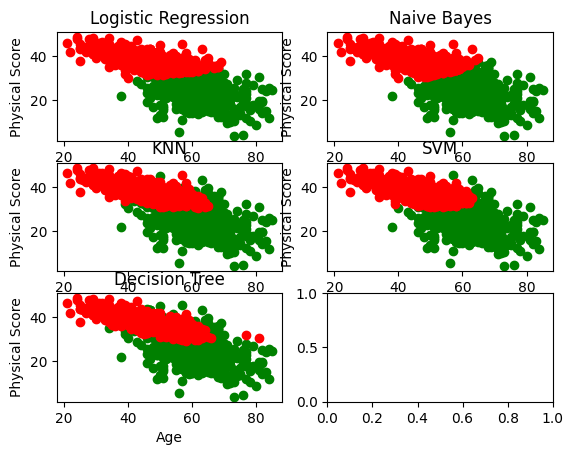

In [30]:
# create sub plots with 3 rows and 2 columns
fig, axs = plt.subplots(3, 2)

# create classification visualization for all models
for model_name, model, position in models:
    # item[0] = model name
    # item[1] = model
    # item[2] = chart position

    # get the predictions
    y_pred = model.predict(x_test)
    y_true = y_test
    
    axs[position[0], position[1]].scatter(
        x_test['age'][y_pred == 0], 
        x_test['physical_score'][y_pred == 0],
        color="green", label="Wont suffer")

    axs[position[0], position[1]].scatter(
        x_test['age'][y_pred == 1], 
        x_test['physical_score'][y_pred == 1],
        color="red", label="Will Suffer")
    # plt.xlabel('age')
    # plt.ylabel('physical score')
    axs[position[0], position[1]].set_title(model_name)
    axs[position[0], position[1]].set(xlabel="Age", ylabel="Physical Score")